In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funcoes_aed import *

---
# Cria o dataframe das vacinas, realizando algumas trativas básicas

In [28]:
df = cria_dataframe_vacinas()
df.head()

,COD,CODMUN7,UF,ANO,MUNICIPIO,SCR1,SCR2,POPRURAL,POPURB,RDPC,...,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,GP_SCR1,GP_SCR2
0,110001,1100015.0,Rondonia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.730000,57.270000,476.989990,...,22.58,94.050003,93.980003,9.31,26.920000,3.450000,67.180000,80.930000,Adequada,Baixa
1,110002,1100023.0,Rondonia,2016,Ariquemes,98.919998,89.519997,15.300000,84.699997,689.950012,...,27.15,96.720001,98.580002,11.40,32.630001,20.410000,72.620003,61.919998,Adequada,Baixa
2,110003,1100031.0,Rondonia,2016,Cabixi,109.639999,77.110001,57.340000,42.660000,457.170013,...,19.93,99.139999,96.360001,3.31,16.420000,4.800000,65.750000,100.000000,Adequada,Baixa
3,110004,1100049.0,Rondonia,2016,Cacoal,99.180000,82.320000,21.190001,78.809998,738.059998,...,20.50,98.169998,98.889999,1.85,31.730000,20.719999,74.589996,71.190002,Adequada,Baixa
4,110005,1100056.0,Rondonia,2016,Cerejeiras,99.279999,85.510002,15.330000,84.669998,577.179993,...,16.66,91.889999,98.849998,5.34,39.970001,6.120000,76.809998,95.910004,Adequada,Baixa


--- 

## Matriz de correlação

Inicialmente gerei a primeira matriz sem nenhum filtro.<br> Com os resultados desse primeiro plot, tracei algumas linhas para me ajudar a filtrar algumas colunas.

__Linha Vermelha__ : É a minha principal variavél, taxa de vacinados.
<br>__Linha Preta__ : São as colunas na horizontal com uma alta taxa.
<br> __Linha Amarela__ : São as colunas na vertical com uma alta taxa.

![alt text](./imagens/corr.png)

Text(0.5, 1.0, 'Gráfico de Correlação das Variavéis')

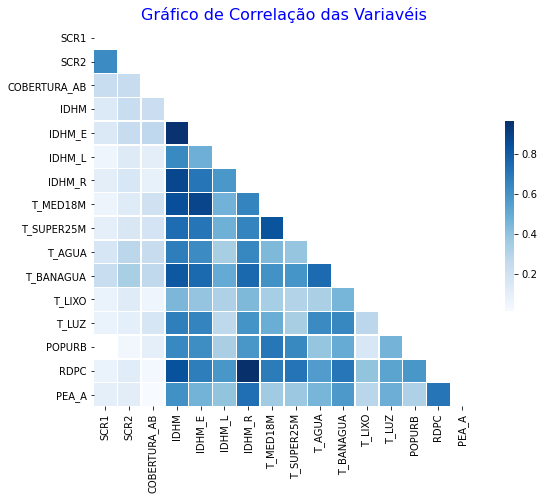

In [49]:
corr = df.loc[:,['SCR1', 'SCR2', 'COBERTURA_AB', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R', 'T_MED18M', 'T_SUPER25M', 'T_AGUA'
 , 'T_BANAGUA', 'T_LIXO', 'T_LUZ', 'POPURB', 'RDPC', 'PEA_A']].corr().round(4)
corr = corr[corr > 0]

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 7))

ax = sns.heatmap(corr, mask=mask, cmap='Blues',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title("Gráfico de Correlação das Variavéis", fontdict={'fontsize': 16, 'color': 'Blue'})

In [50]:
df_radar = pd.DataFrame(
    df[ df['UF'] == 'Rondonia' ].agg({'SCR1': np.median, 'SCR2': np.median, 'COBERTURA_AB': np.median, 'IDHM': np.median}).reset_index()
)
df_radar.columns = ['var', 'vl']

fig = px.line_polar(df_radar, r='vl', theta='var', line_close=True)
fig.show()